# Airplane Customers Satisfaction Analysis 
### Dataset courtesy [Maven Analytics](https://www.mavenanalytics.io/data-playground?accessType=open&dataStructure=5wfxyeVf1etbP4TXdyPdG1)


### Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience. 
### This analysis is to analyze how each factors affects the customers satisfaction.



# Data Wrangling

### General Properties

In [1]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# data dictionary
data_dict = pd.read_csv("data_dictionary.csv")

data_dict.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Field,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service
Description,Unique passenger identifier,Gender of the passenger (Female/Male),Age of the passenger,Type of airline customer (First-time/Returning),Purpose of the flight (Business/Personal),Travel class in the airplane for the passenger...,Flight distance in miles,Flight departure delay in minutes,Flight arrival delay in minutes,Satisfaction level with the convenience of the...,Satisfaction level with the online booking exp...,Satisfaction level with the check-in service f...,Satisfaction level with the online boarding ex...,Satisfaction level with the gate location in t...,Satisfaction level with the on-boarding servic...,Satisfaction level with the comfort of the air...,Satisfaction level with the leg room of the ai...,Satisfaction level with the cleanliness of the...,Satisfaction level with the food and drinks on...,Satisfaction level with the in-flight service ...


In [3]:
#import data
data = pd.read_csv("airline_passenger_satisfaction.csv")

data.head().T


,0,1,2,3,4
ID,1,2,3,4,5
Gender,Male,Female,Male,Male,Female
Age,48,35,41,50,49
Customer Type,First-time,Returning,Returning,Returning,Returning
Type of Travel,Business,Business,Business,Business,Business
Class,Business,Business,Business,Business,Business
Flight Distance,821,821,853,1905,3470
Departure Delay,2,26,0,0,0
Arrival Delay,5.0,39.0,0.0,0.0,1.0
Departure and Arrival Time Convenience,3,2,4,2,3


In [4]:
#Check for missing data

data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

>  Only Arrival has missing 393 missing values


In [5]:
#Check Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

> Arrival delay is a float rather than integer

In [6]:
# data description
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


> Observations/Insights
> 1. The average customer age is 39 years
> 2. The average flight distance is 1190 miles
> 3. The Average flight delay for arrival and departure is 15 mins and 14 mins respectively

In [7]:
#Check for duplictaes
sum(data.duplicated())

0

In [8]:
#Check unique values for all coulums

for i in data.columns:
    print(i)
    print(data[i].nunique())

ID
129880
Gender
2
Age
75
Customer Type
2
Type of Travel
2
Class
3
Flight Distance
3821
Departure Delay
466
Arrival Delay
472
Departure and Arrival Time Convenience
6
Ease of Online Booking
6
Check-in Service
6
Online Boarding
6
Gate Location
6
On-board Service
6
Seat Comfort
6
Leg Room Service
6
Cleanliness
6
Food and Drink
6
In-flight Service
6
In-flight Wifi Service
6
In-flight Entertainment
6
Baggage Handling
5
Satisfaction
2


### Data Cleaning

> Missing data could be a result of human error, thus we'd replace NaN with 0 which means "Not Applicable"

In [9]:
# replace missing data
data["Arrival Delay"] = data["Arrival Delay"].replace(np.nan, 0)

In [10]:
#Check for missing data

data.isnull().sum()


ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [11]:
#change data type of arrival day
data['Arrival Delay'] = data['Arrival Delay'].astype("int")

### Feature Engineering

In [12]:
#Create new column for total delay
data["Total Delay"] =  data['Arrival Delay'] + data['Departure Delay']

In [13]:
#Create Age category column
data['Age_cat'] = pd.cut(
                        x=data['Age'],
                        bins=[0, 12, 19, 59, 100],
                        labels= ["Child", "Teen","Adult", "Elder"],
                        include_lowest=True)

In [14]:
#Create Flight distance category
data['Flight_cat'] = pd.cut(
                        x=data['Flight Distance'],
                        bins=[0, 700, 3000, 5000],
                        labels= ["Short-Haul", "Medium-Haul","Long-Haul"], #based on internet research
                        include_lowest=True)

In [15]:
#check new columns
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total Delay,Age_cat,Flight_cat
0,1,Male,48,First-time,Business,Business,821,2,5,3,...,5,5,5,3,5,5,Neutral or Dissatisfied,7,Adult,Medium-Haul
1,2,Female,35,Returning,Business,Business,821,26,39,2,...,5,3,5,2,5,5,Satisfied,65,Adult,Medium-Haul
2,3,Male,41,Returning,Business,Business,853,0,0,4,...,5,5,3,4,3,3,Satisfied,0,Adult,Medium-Haul
3,4,Male,50,Returning,Business,Business,1905,0,0,2,...,4,4,5,2,5,5,Satisfied,0,Adult,Medium-Haul
4,5,Female,49,Returning,Business,Business,3470,0,1,3,...,5,4,3,3,3,3,Satisfied,1,Adult,Long-Haul


In [16]:
data.to_csv('airline_clean.csv', index=False)

# Data Visualizations & Exploratory Data Analysis


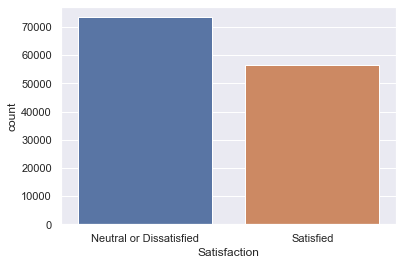

In [17]:
sns.countplot(x="Satisfaction", data=data)
sns.set(rc = {'figure.figsize':(8,5)})

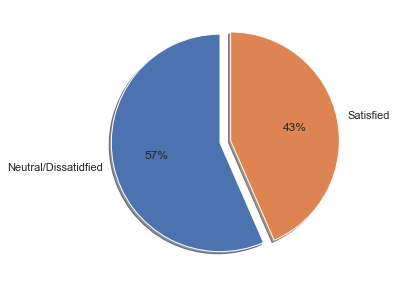

In [18]:
data_1 = data.Satisfaction.value_counts()
labels = ["Neutral/Dissatidfied", "Satisfied"]
plt.pie(data_1, labels=labels,autopct = '%0.0f%%', explode=(0,0.1), shadow=True, startangle=90)
sns.set(rc = {'figure.figsize':(8,5)})
plt.show()

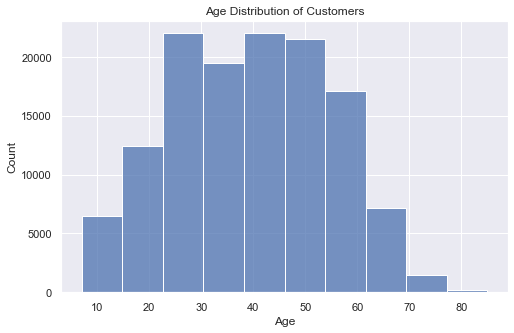

In [19]:
sns.histplot(data, x="Age",bins=10)
sns.set(rc = {'figure.figsize':(8,5)})
plt.title("Age Distribution of Customers")
plt.show()

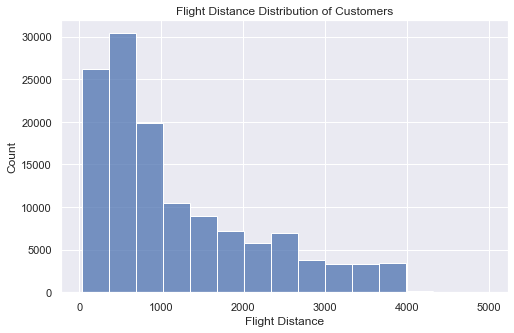

In [39]:
sns.histplot(data, x="Flight Distance", bins=15)
sns.set(rc = {'figure.figsize':(8,5)})
plt.title("Flight Distance Distribution of Customers")
plt.show()

Text(0, 0.5, 'Number of Customers')

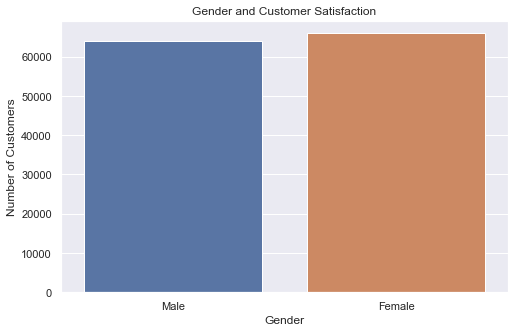

In [20]:
sns.countplot(x="Gender", data=data)
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers");

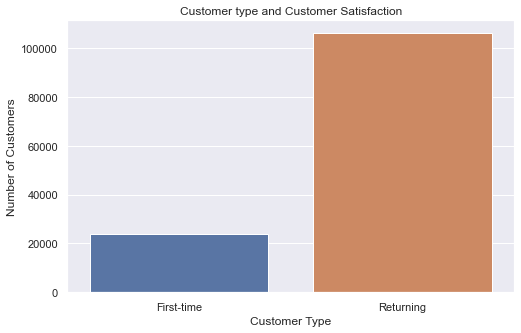

In [21]:
sns.countplot(x='Customer Type', data=data)
plt.title("Customer type")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.show()

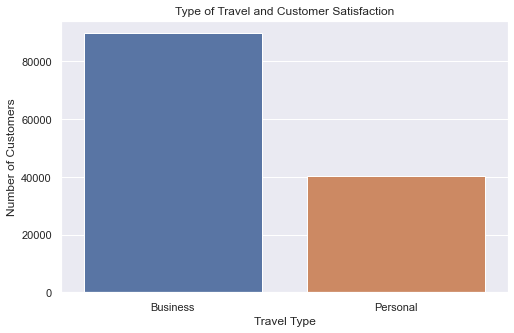

In [22]:
sns.countplot(x="Type of Travel", data=data)
plt.title("Type of Travel")
plt.xlabel("Travel Type")
plt.ylabel("Number of Customers")
plt.show()

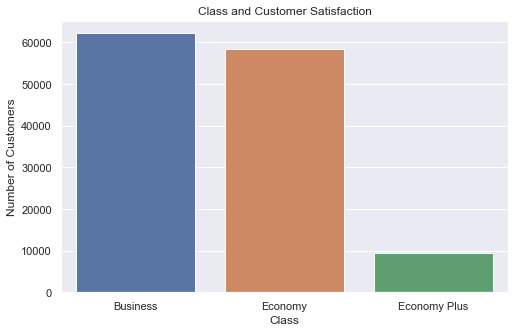

In [23]:
sns.countplot(x="Class", data=data)
plt.title("Class")
plt.xlabel("Class")
plt.ylabel("Number of Customers")
plt.show()

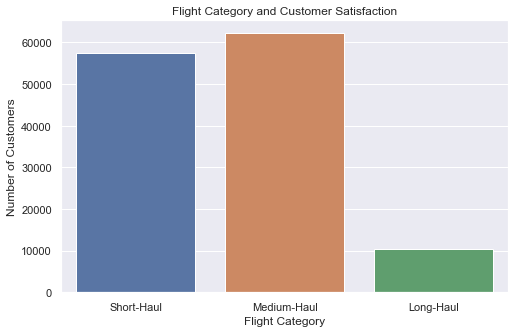

In [24]:
sns.countplot(x="Flight_cat", data=data)
plt.title("Flight Category")
plt.xlabel("Flight Category")
plt.ylabel("Number of Customers")
plt.show()

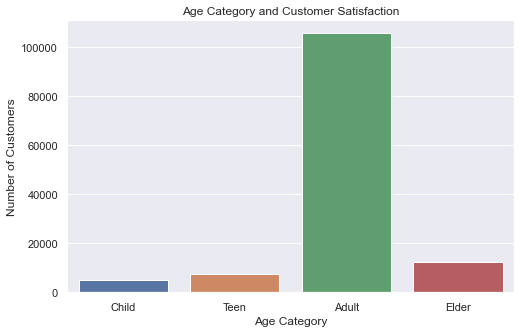

In [25]:
sns.countplot(x="Age_cat", data=data)
plt.title("Age Category")
plt.xlabel("Age Category")
plt.ylabel("Number of Customers")
plt.show()

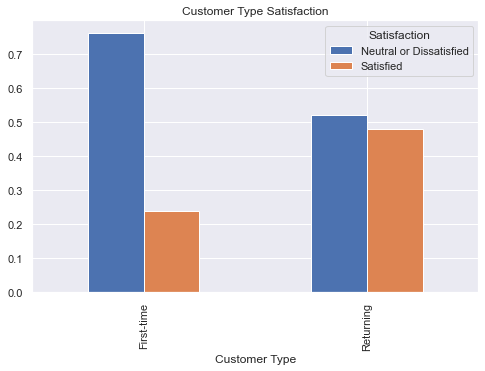

In [31]:
# Visualize how customer type affects satisfaction.
data.groupby("Customer Type")["Satisfaction"].value_counts(normalize=True).unstack(1).plot(kind="bar")
plt.title("Customer Type Satisfaction");

> About 75% of first time customers are dissatidfied with their flight and the service provided. About 52% of returning customers are dissatidfied with their flight and the service provided.

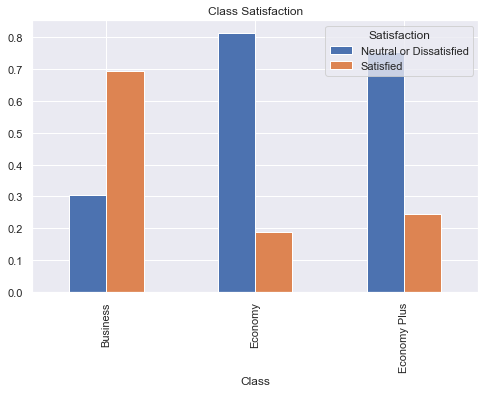

In [32]:
# Class and satisfaction
data.groupby("Class")["Satisfaction"].value_counts(normalize=True).unstack(1).plot(kind="bar")
plt.title("Class Satisfaction");

> Business has the most satisfied customers with about 70% of passengers satisfactied. 
<br>Economy class has over 80% of its passengers dissatidfied.
<br>Economy Plus has only 24% of its passengers satisfactied.

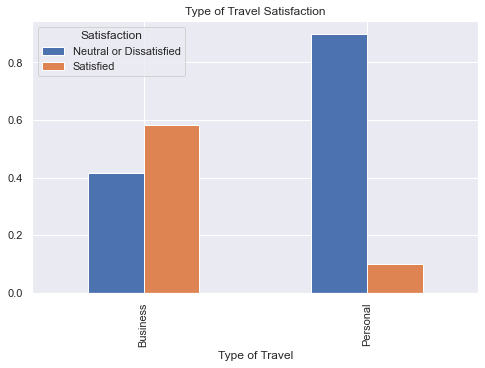

In [33]:
#Travel type satisfaction.
data.groupby("Type of Travel")["Satisfaction"].value_counts(normalize=True).unstack(1).plot(kind="bar")
plt.title("Type of Travel Satisfaction");

> Business travels offer more satisfaction with almost 60% satisfied. <br>
Over 80% of passengers who go on personal business are dissatidfied with their flight

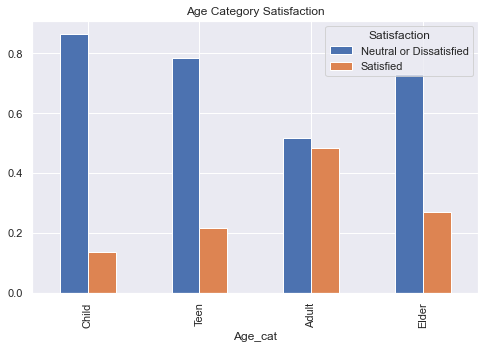

In [34]:
#Age category and  satisfaction
data.groupby("Age_cat")["Satisfaction"].value_counts(normalize=True).unstack(1).plot(kind="bar")
plt.title("Age Category Satisfaction");

> Adults(20 to 59) are the most satisfied passengers of all age group category. <br>
Children(0 to 12) are the most dissatidfied passengers of all age group category. <br>
Almost 80% of Teens and Elders are dissatidfied.

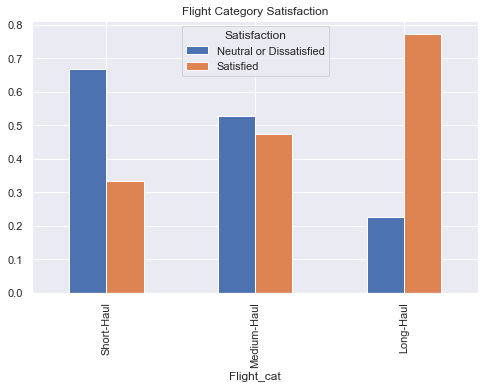

In [35]:
# flight category and satisfaction.
data.groupby("Flight_cat")["Satisfaction"].value_counts(normalize=True).unstack(1).plot(kind="bar")
plt.title("Flight Category Satisfaction");

> Long haul flights(>3000 miles) have the highest satisfaction rate with almost 80% customers satisfied.<br>
Short haul flights(<700 miles) have the lowest satisfaction rate(~70% customers dissatidfied)<br>
Medium haul flights have an almost 50% satisfaction rate.

In [ ]:
# Average rating for all services.

services = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

for a in services:
       

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Total Delay', 'Age_cat', 'Flight_cat'],
      dtype='object')

### Question: What is the average total delay for satisfied and dissatidfied customers.

In [40]:
data.groupby("Satisfaction")["Total Delay"].mean()

Satisfaction
Neutral or Dissatisfied    33.410118
Satisfied                  25.006770
Name: Total Delay, dtype: float64

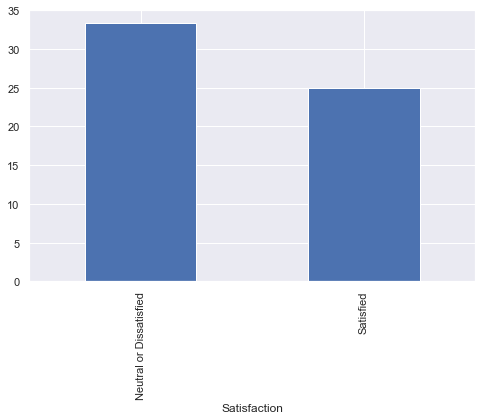

In [44]:
data.groupby("Satisfaction")["Total Delay"].mean().plot(kind='bar');

> Longer delay time == Dissatisfied customers.

### Question: Does flight distance affect customer preferences?


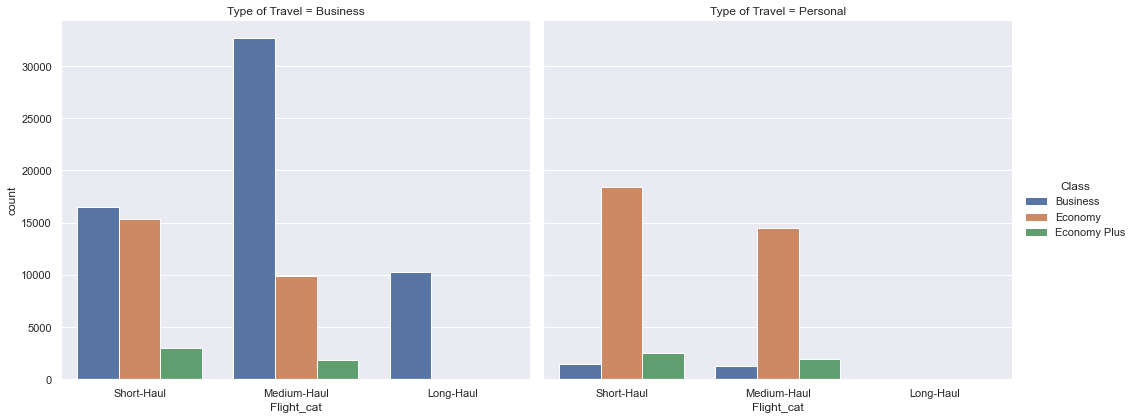

In [26]:
sns.catplot(x="Flight_cat", hue="Class",col="Type of Travel", col_wrap=2,
                data=data,
                kind="count", height=6, aspect=1.2)

plt.show()

> When flying for Business purposes passengers irrespective of their flight distance prefer to fly Business class <br>
> For personal travels Economy class is most preferred. <br>
> Most Business purpose travel cover medium hauls while personal purpose cover shorter distances.

### Question:Are repeating airline passengers?

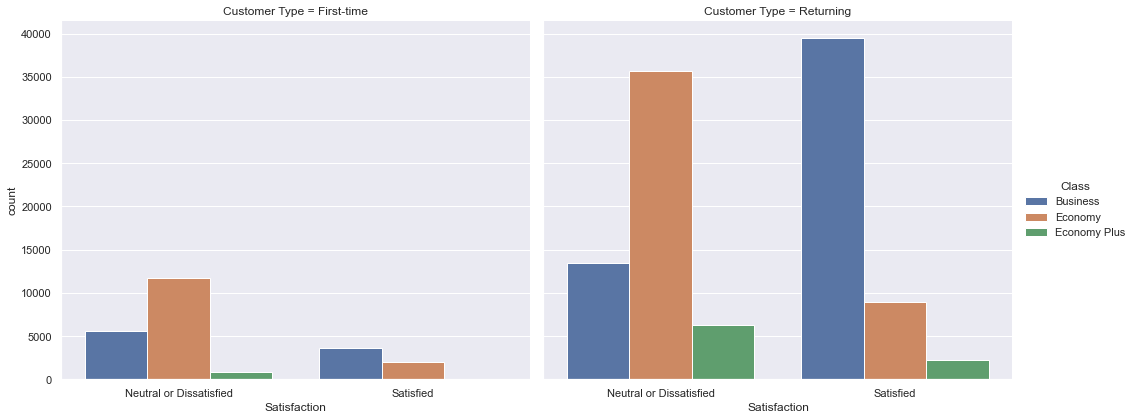

In [27]:
sns.catplot(x="Satisfaction", hue="Class",col="Customer Type", col_wrap=2,
                data=data,
                kind="count", height=6, aspect=1.2)

plt.show()